In [18]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#from scipy.stats import linregress
#import numpy as np

# Read in data
df = pd.read_csv('data_cleaned.csv')
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Scheduled_Day_Date,Scheduled_Hour,Scheduled_Day_of_Week,Scheduled_Month,Appointment_Day_Date,Appointment_Day_of_Week,Appointment_Month,Days_Between,lat,lon
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,2016-04-29,18,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-22.788662,-43.079799
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,2016-04-29,17,Friday,4,2016-04-29,Friday,4,0,-23.354233,-44.725856
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112


In [19]:
#Verify the columns are showing properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Patient_ID               110526 non-null  float64
 1   Appointment_ID           110526 non-null  int64  
 2   Gender                   110526 non-null  object 
 3   Scheduled_Day            110526 non-null  object 
 4   Appointment_Day          110526 non-null  object 
 5   Age                      110526 non-null  int64  
 6   Neighbourhood            110526 non-null  object 
 7   Scholarship              110526 non-null  int64  
 8   Hypertension             110526 non-null  int64  
 9   Diabetes                 110526 non-null  int64  
 10  Alcoholism               110526 non-null  int64  
 11  Handicap                 110526 non-null  int64  
 12  SMS_Received             110526 non-null  int64  
 13  No_Show                  110526 non-null  object 
 14  No_S

In [20]:
#Count the number of patients who received SMS messages
#count_0 = no SMS Received
#count_1 = SMS Received
count_0 = (df['SMS_Received'] == 0).sum()
count_1 = (df['SMS_Received'] == 1).sum()

#Print the values of each
print("Count of 0:", count_0)
print("Count of 1:", count_1)

Count of 0: 75044
Count of 1: 35482


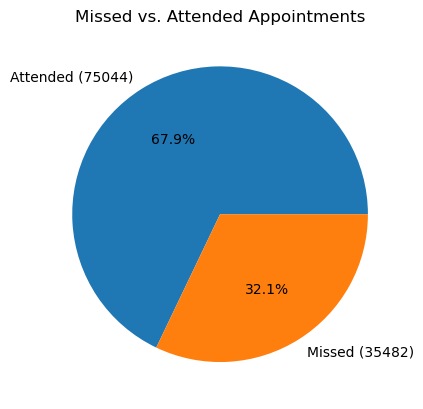

In [21]:
#Total Attended vs Missed Appointments
labels = ['Attended (75044)', 'Missed (35482)']

missed_vs_attend = [75044, 35482]
total_appointments = sum(missed_vs_attend)

plt.pie(missed_vs_attend, labels=labels, autopct='%1.1f%%')
plt.title('Missed vs. Attended Appointments')
plt.show()

In [22]:
#Create a DataFrame called 'SMS_Summary' 
sms_summary = df.groupby(['SMS_Received', 'No_Show'])['Appointment_ID'].count()
sms_summary

SMS_Received  No_Show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: Appointment_ID, dtype: int64

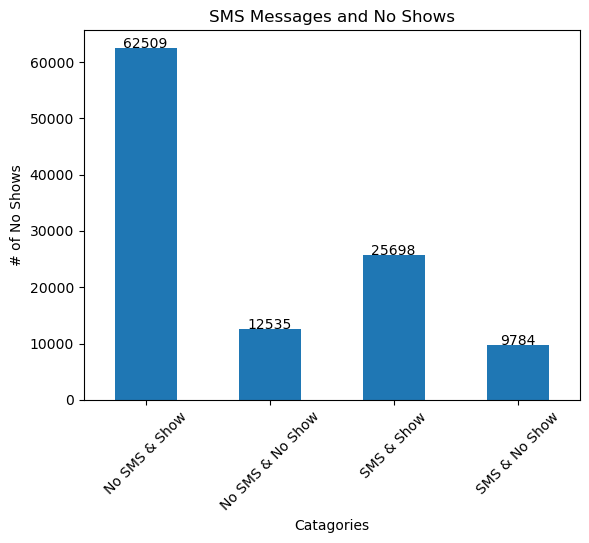

In [23]:
#Creating a Bar Graph to show the totals for each of these values
#Customizing x-axis labels
custom_ticks_x = [0,1,2,3]
custom_labels_x = ['No SMS & Show', 'No SMS & No Show', 'SMS & Show', 'SMS & No Show']

#Customize the bar graph
sms_summary.plot.bar(title='SMS Messages and No Shows',
                     ylabel='# of No Shows',
                     xlabel='Catagories')
plt.xticks(custom_ticks_x, custom_labels_x, rotation=45)

#Annotate the number on top of each bar
for i, v in enumerate(sms_summary):
    plt.text(i, v + 0.1, str(v), ha='center')
    
#Display the graph
plt.show()


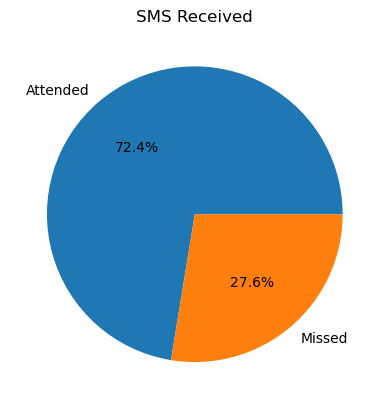

In [24]:
#Pie chart of Missed Appointments
labels = ['Attended', 'Missed']

sms_received = [25698, 9784]
total_sms_received = sum(sms_received)

plt.pie(sms_received, labels=labels, autopct='%1.1f%%')
plt.title('SMS Received')
plt.show()


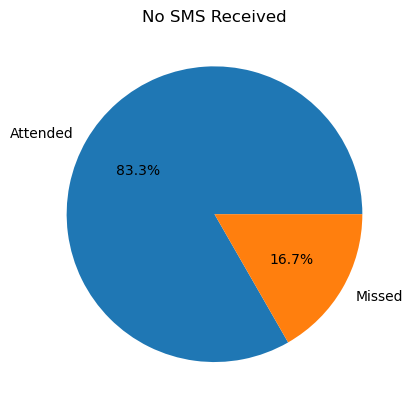

In [25]:
#Pie chart of Attended appointments
labels = ['Attended', 'Missed']

no_sms_received = [62509, 12535]
total_no_sms_received = sum(no_sms_received)

plt.pie(no_sms_received, labels=labels, autopct='%1.1f%%')
plt.title('No SMS Received')
plt.show()

In [26]:
#Check for multiple appointments for patients
patient_count = df["Patient_ID"].nunique()
appointment_count = df["Appointment_ID"].nunique()

print(patient_count)
print(appointment_count)

62298
110526


In [27]:
patient_summary = df.groupby(['Patient_ID'])['Appointment_ID'].count().reset_index(name='#_of_Visits')
print(patient_summary)

visit_summary = patient_summary.groupby(['#_of_Visits'])['Patient_ID'].count().reset_index(name='Patient_count')
visit_summary.set_index(['#_of_Visits'], inplace= True)
visit_summary.tail(10)


         Patient_ID  #_of_Visits
0      3.921784e+04            1
1      4.374176e+04            1
2      9.377953e+04            1
3      1.417242e+05            1
4      5.376153e+05            1
...             ...          ...
62293  9.999320e+14            5
62294  9.999350e+14            1
62295  9.999465e+14            1
62296  9.999686e+14            1
62297  9.999816e+14            1

[62298 rows x 2 columns]


,Patient_count
#_of_Visits,
50,1
51,1
54,1
55,1
57,1
62,4
65,1
70,1
84,1


In [28]:
total = visit_summary['Patient_count'].sum()
visit_summary['Percent_of_total'] = visit_summary['Patient_count']*100 / total

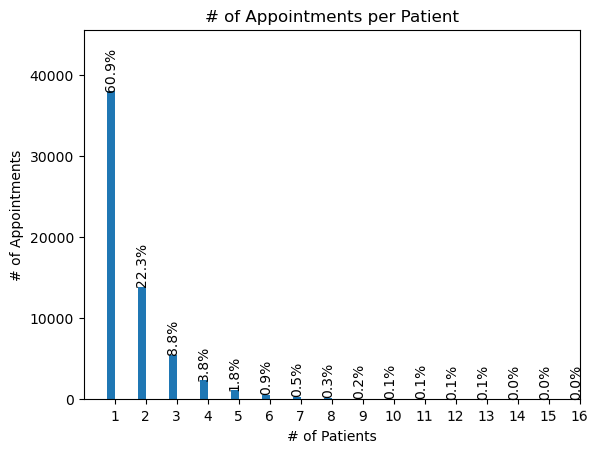

In [29]:
#Creating a Bar Graph to show the totals for each of these values
#Customizing x-axis labels
custom_ticks_x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
custom_labels_x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]

#Customize the bar graph
ax = visit_summary.plot.bar( 
                            title='# of Appointments per Patient',
                            ylabel='# of Appointments',
                            xlabel='# of Patients',
                            legend=False)
plt.xticks(custom_ticks_x, custom_labels_x, rotation=1)

#Limit the x axis
plt.xlim(-1, 15)
ax.set_ylim(0, max(values) * 1.2)  # Extend by 20%

# Reset the index of visit_summary
visit_summary.reset_index(drop=True, inplace=True)

# Add annotations to each bar in the bar plot
for i, bar in enumerate(ax.patches):
    if i < len(visit_summary):
        ax.annotate(f"{visit_summary['Percent_of_total'][i]:.1f}%", 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    rotation=90, ha='center', va='bottom')

# Save the graph
#plt.savefig("output/Number_of_visits.png")

#Display the graph
plt.show()

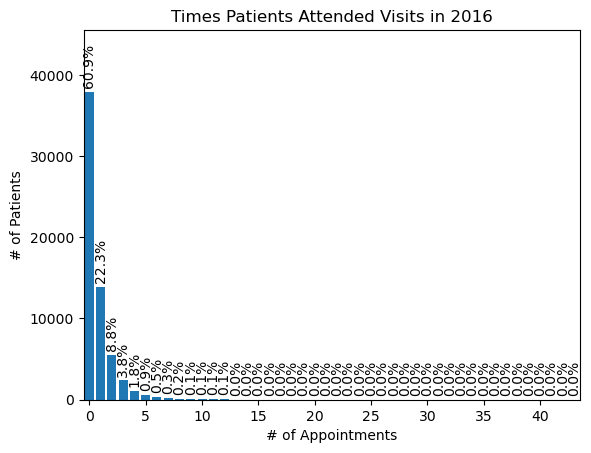

In [30]:
# Graph the number if visits that patients had in 2016
categories = visit_summary.index
values = visit_summary['Patient_count']
percentages = visit_summary['Percent_of_total']

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, values)
ax.set_xlim(-0.5, len(categories) - 0.5)  # Add padding on both sides
ax.set_ylim(0, max(values) * 1.2)  # Extend by 20%

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                rotation=90,
                ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('# of Appointments')
ax.set_ylabel('# of Patients')
ax.set_title('Times Patients Attended Visits in 2016')

# Show the plot
plt.show()